In [9]:
%pip install scikit-learn numpy pandas torch

   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/766.6 MB 589.9 kB/s eta 0:14:23^C
   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/766.6 MB 589.9 kB/s eta 0:14:23

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.datasets import fetch_openml

In [6]:
boston = fetch_openml(name='boston')
print(boston.DESCR)

/home/teogalletta/Documents/my-obsidian-vault/100 university/3201 Machine Learning/exercises/.venv/lib/python3.13/site-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [7]:
X = boston.data.to_numpy().astype(float)
Y = boston.target.to_numpy().astype(float)

print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [8]:
import numpy as np
import torch

np.random.seed(123)
torch.random.manual_seed(123)
idx = np.random.permutation(len(X))

ModuleNotFoundError: No module named 'torch'

In [ ]:
X = X[idx]
Y = Y[idx]

In [ ]:
X_training = torch.Tensor(X[50:])
Y_training = torch.Tensor(Y[50:])

X_testing = torch.Tensor(X[:50])
Y_testing = torch.Tensor(Y[:50])

In [ ]:
theta = torch.Tensor(13)
theta_0 = torch.Tensor(1)

theta.requires_grad_(True)
theta_0.requires_grad_(True)

theta.data.normal_(0,0.1)
theta_0.data.normal_(0,0.1)

theta

tensor([-0.0111,  0.0120, -0.0370, -0.0240, -0.1197,  0.0209, -0.0972, -0.0755,
         0.0324, -0.0109,  0.0210, -0.0391,  0.0235], requires_grad=True)

In [ ]:
def linear_regression(input, theta, theta_0):
  return input.mul(theta).sum(1)+(theta_0)

In [ ]:
y = linear_regression(X_training, theta, theta_0)
print(y[:10])

tensor([-20.8190, -23.3360, -24.6247, -31.4600, -27.4998, -28.1950, -27.1047,
        -26.2724, -18.8539, -31.4594], grad_fn=<SliceBackward0>)


In [ ]:
def loss(input, target):
  return ((input-target)**2).mean()

In [ ]:
print(loss(y, Y_training))

tensor(2274.0801, grad_fn=<MeanBackward0>)


# Ottimizzazione pesi

In [ ]:
means = X_training.mean(0)
stds = X_training.std(0)
print(means)
print(stds)

tensor([3.5481e+00, 1.1293e+01, 1.1224e+01, 6.1404e-02, 5.5591e-01, 6.2701e+00,
        6.8338e+01, 3.7963e+00, 9.5658e+00, 4.0893e+02, 1.8468e+01, 3.5775e+02,
        1.2820e+01])
tensor([8.4949e+00, 2.3287e+01, 6.9195e+00, 2.4033e-01, 1.1805e-01, 6.9616e-01,
        2.8338e+01, 2.1295e+00, 8.7019e+00, 1.6880e+02, 2.1430e+00, 9.0201e+01,
        7.1928e+00])


In [ ]:
X_training_norm = (X_training - means) / stds

In [ ]:
print(X_training_norm.mean(0))
print(X_training_norm.std(0))

tensor([ 0.0000e+00,  7.3199e-09,  1.2914e-07,  2.0914e-09,  3.1685e-07,
        -4.2664e-07,  9.5158e-08,  1.2444e-07,  1.7777e-08,  2.1437e-08,
        -2.1332e-07, -1.1503e-07,  1.6731e-07])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000])


normalizzazione

In [ ]:
lr = 0.1
epochs = 100

means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means) / stds
X_testing_norm = (X_testing-means) / stds

theta = torch.Tensor(13)
theta_0 = torch.Tensor(1)
theta.normal_(0,0.1)
theta_0.normal_(0,0.1)
theta.requires_grad_(True)
theta_0.requires_grad_(True)

losses = []
for e in range(epochs):
  y = linear_regression(X_training_norm, theta, theta_0)
  l = loss(y, Y_training)
  l.backward()

  print(f"Epoch: {e} - Loss: {l.item():0.2f}")
  losses.append(l.item())

  theta.data.sub_(lr * theta.grad.data)
  theta_0.data.sub_(lr * theta_0.grad.data)

  theta.grad.data.zero_()
  theta_0.grad.data.zero_()

Epoch: 0 - Loss: 575.60
Epoch: 1 - Loss: 357.54
Epoch: 2 - Loss: 235.54
Epoch: 3 - Loss: 158.49
Epoch: 4 - Loss: 109.26
Epoch: 5 - Loss: 77.76
Epoch: 6 - Loss: 57.57
Epoch: 7 - Loss: 44.62
Epoch: 8 - Loss: 36.30
Epoch: 9 - Loss: 30.95
Epoch: 10 - Loss: 27.49
Epoch: 11 - Loss: 25.24
Epoch: 12 - Loss: 23.78
Epoch: 13 - Loss: 22.82
Epoch: 14 - Loss: 22.18
Epoch: 15 - Loss: 21.75
Epoch: 16 - Loss: 21.45
Epoch: 17 - Loss: 21.25
Epoch: 18 - Loss: 21.10
Epoch: 19 - Loss: 20.98
Epoch: 20 - Loss: 20.90
Epoch: 21 - Loss: 20.83
Epoch: 22 - Loss: 20.77
Epoch: 23 - Loss: 20.72
Epoch: 24 - Loss: 20.68
Epoch: 25 - Loss: 20.64
Epoch: 26 - Loss: 20.60
Epoch: 27 - Loss: 20.57
Epoch: 28 - Loss: 20.54
Epoch: 29 - Loss: 20.51
Epoch: 30 - Loss: 20.49
Epoch: 31 - Loss: 20.46
Epoch: 32 - Loss: 20.44
Epoch: 33 - Loss: 20.42
Epoch: 34 - Loss: 20.40
Epoch: 35 - Loss: 20.38
Epoch: 36 - Loss: 20.36
Epoch: 37 - Loss: 20.34
Epoch: 38 - Loss: 20.33
Epoch: 39 - Loss: 20.31
Epoch: 40 - Loss: 20.30
Epoch: 41 - Loss: 20.

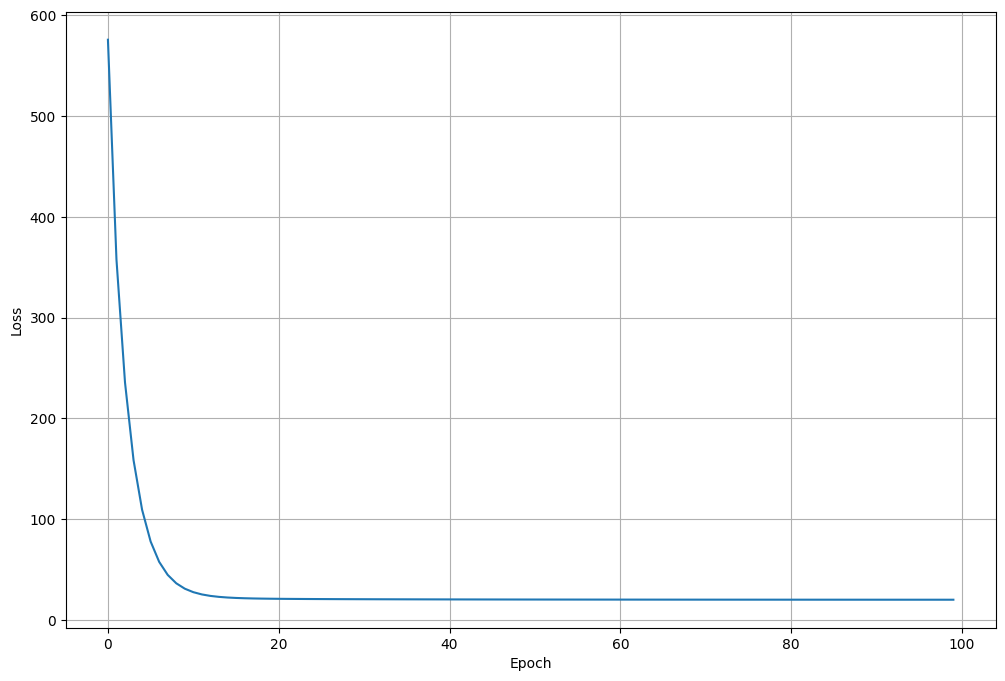

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [ ]:
lr = 0.1
epochs = 50

means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means) / stds
X_testing_norm = (X_testing-means) / stds

theta = torch.Tensor(13)
theta_0 = torch.Tensor(1)
theta.normal_(0,0.1)
theta_0.normal_(0,0.1)
theta.requires_grad_(True)
theta_0.requires_grad_(True)

losses_training = []
losses_testing = []
for e in range(epochs):
  y = linear_regression(X_training_norm, theta, theta_0)
  l = loss(y, Y_training)
  l.backward()

  print(f"Epoch: {e} - Loss: {l.item():0.2f}")
  losses_training.append(l.item())

  theta.data.sub_(lr * theta.grad.data)
  theta_0.data.sub_(lr * theta_0.grad.data)

  theta.grad.data.zero_()
  theta_0.grad.data.zero_()

  with torch.set_grad_enabled(False):
    y_test = linear_regression(X_testing_norm, theta, theta_0)
    loss_test = loss(y_test, Y_testing)
    losses_testing.append(loss_test.item())

Epoch: 0 - Loss: 578.13
Epoch: 1 - Loss: 356.46
Epoch: 2 - Loss: 234.65
Epoch: 3 - Loss: 157.88
Epoch: 4 - Loss: 108.85
Epoch: 5 - Loss: 77.48
Epoch: 6 - Loss: 57.39
Epoch: 7 - Loss: 44.50
Epoch: 8 - Loss: 36.22
Epoch: 9 - Loss: 30.89
Epoch: 10 - Loss: 27.45
Epoch: 11 - Loss: 25.22
Epoch: 12 - Loss: 23.77
Epoch: 13 - Loss: 22.81
Epoch: 14 - Loss: 22.18
Epoch: 15 - Loss: 21.75
Epoch: 16 - Loss: 21.46
Epoch: 17 - Loss: 21.25
Epoch: 18 - Loss: 21.10
Epoch: 19 - Loss: 20.99
Epoch: 20 - Loss: 20.90
Epoch: 21 - Loss: 20.83
Epoch: 22 - Loss: 20.78
Epoch: 23 - Loss: 20.73
Epoch: 24 - Loss: 20.68
Epoch: 25 - Loss: 20.64
Epoch: 26 - Loss: 20.61
Epoch: 27 - Loss: 20.58
Epoch: 28 - Loss: 20.55
Epoch: 29 - Loss: 20.52
Epoch: 30 - Loss: 20.49
Epoch: 31 - Loss: 20.47
Epoch: 32 - Loss: 20.45
Epoch: 33 - Loss: 20.42
Epoch: 34 - Loss: 20.40
Epoch: 35 - Loss: 20.38
Epoch: 36 - Loss: 20.37
Epoch: 37 - Loss: 20.35
Epoch: 38 - Loss: 20.33
Epoch: 39 - Loss: 20.32
Epoch: 40 - Loss: 20.30
Epoch: 41 - Loss: 20.

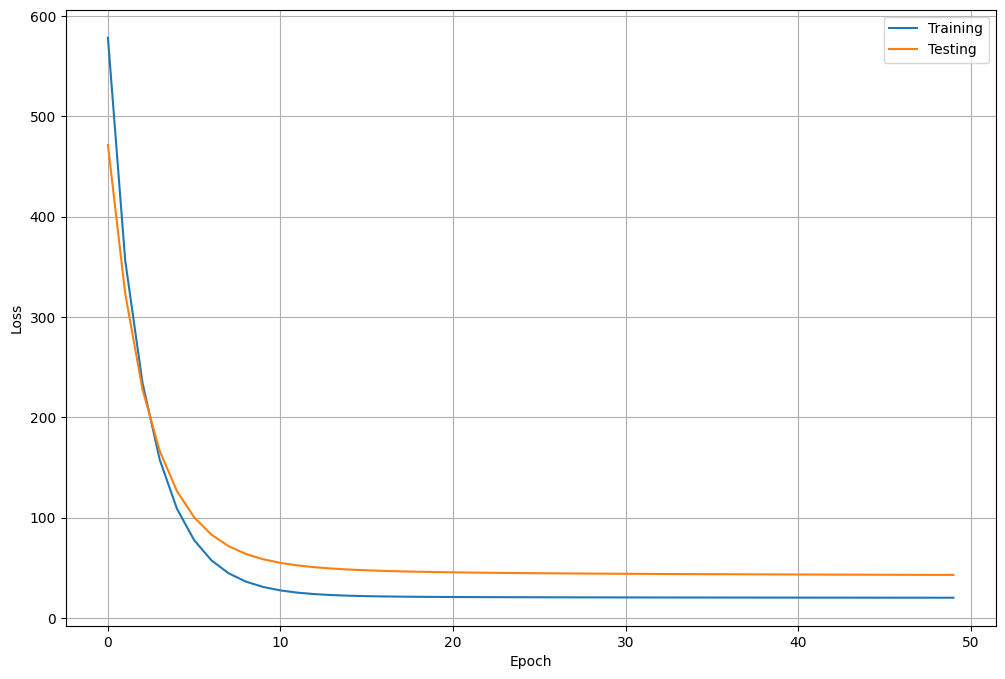

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(losses_training)
plt.plot(losses_testing)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training", "Testing"])
plt.grid()
plt.show()